<a href="https://colab.research.google.com/github/MALLIKDEENAR/Daily-Transactions-Finance-Analyst-/blob/main/Daily_Transactions_(Finance_Analyst).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) with Pandas in Daily Transactions**

The purpose of this project is to master the exploratory data analysis (EDA) in daily household transactions with Pandas framework.

# **Goals of the Project:**

1. Explore a daily house household transaction dataset with Pandas framework.

2. Analyzeing daily financial transactions to identify trends, patterns, and insights.

3. Visualize the dataset with various plot types.

# **Column Descriptors**

● Date: The date and time when the transaction was made

● Mode: The payment mode used for the transaction

● Category: Each record is divided into a set of categories of transactions

● Subcategory: Categories are further broken down into Subcategories of
transactions

● Note: A brief description of the transaction made

● Amount: The transactional amount

● Income/Expense: The indicator of each transaction representing either expense
or income

● Currency: All transactions are recorded in official currency of India

# **Step 1: Import Libraries and Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset exploration

In this section we will explore the sourse dataset.

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [2]:
# Load the dataset
df = pd.read_csv('/content/Daily Household Transactions.csv')

In [3]:
# Display the first few rows of the dataset
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


Let's look at the dataset size, feature names and their types.

In [4]:
df.shape
df.tail(5)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
2456,1/1/2015,Cash,Transportation,NaN,share jeep - Place T base to top,20.0,Expense,INR
2457,1/1/2015,Cash,Transportation,NaN,share auto - Place H to Place T base,20.0,Expense,INR
2458,1/1/2015,Cash,Transportation,NaN,bus - brc to Place H,30.0,Expense,INR
2459,1/1/2015,Cash,Food,NaN,tea,10.0,Expense,INR
2460,1/1/2015,Cash,Transportation,NaN,share auto - hospital to brc station,10.0,Expense,INR


The dataset contains 1,303 rows and 8 columns, including 1 target feature (Income/Expense).

Output the column (feature) names:

In [5]:
df.columns

Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

To see the general information on all the DataFrame features (columns), we use the info method:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            2461 non-null   object 
 1   Mode            2461 non-null   object 
 2   Category        2461 non-null   object 
 3   Subcategory     1826 non-null   object 
 4   Note            1940 non-null   object 
 5   Amount          2461 non-null   float64
 6   Income/Expense  2461 non-null   object 
 7   Currency        2461 non-null   object 
dtypes: float64(1), object(7)
memory usage: 153.9+ KB


As we can see, the dataset is full, no pass (non-null), so there is no need to fill the gaps. The dataset contains 1 real (float64) and 7 categorical and binary (object) features.

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.bold text

In [7]:
df.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


To see the statistics on non-numeric features, we need to explicitly specify the feature types by the include parameter. We can also set include = all to output statistics on all the existing features.

In [8]:
df.describe(include = ["object"])

,Date,Mode,Category,Subcategory,Note,Income/Expense,Currency
count,2461,2461,2461,1826,1940,2461,2461
unique,1611,12,50,90,1057,3,1
top,1/5/2017,Saving Bank account 1,Food,Milk,milk 1lit,Expense,INR
freq,11,1223,907,162,67,2176,2461


# **Step 2: Data Cleaning**
● Handle missing values.

● Correct data types.

● Remove duplicates.

This command checks each column and shows how many missing values it contains.

In [9]:
# Check for missing values
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


The dataset has no missing values in most columns. Only ‘Subcategory’ (635 missing) and ‘Note’ (521 missing) contain null entries.

This command fills missing values in the ‘Category’ column with the word ‘Unknown’.

In [10]:
# Fill or drop missing values
df['Category'].fillna('Unknown', inplace=True)

/tmp/ipython-input-1606566738.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna('Unknown', inplace=True)


Pandas shows a warning because using inplace=True on a chained assignment may not work in future versions. It suggests using a safer method instead.

This code converts the Date and Amount columns to proper data types and removes duplicate rows from the dataset.

In [11]:
# Convert data types
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [12]:
# Remove duplicates
df.drop_duplicates(inplace=True)

This command displays the data types of all columns in the dataframe.

In [13]:
# Verify data types
df.dtypes

,0
Date,datetime64[ns]
Mode,object
Category,object
Subcategory,object
Note,object
Amount,float64
Income/Expense,object
Currency,object


The Date column is correctly converted to datetime format, Amount is float, and all other columns remain as object (string/text).

# **Step 3: Exploratory Data Analysis (EDA)**

● Summary statistics.

● Distribution of transaction amounts.

● Transaction counts by category and type.

df.describe() gives summary statistics of numeric columns.

In [14]:
# Summary statistics
df.describe()

,Date,Amount
count,1303,2057.000000
mean,2017-05-12 20:41:38.546431232,2791.281176
min,2015-01-13 18:52:47,2.000000
25%,2016-12-18 20:18:45.500000,30.000000
50%,2017-07-27 20:05:23,80.000000
75%,2018-01-30 12:09:30.500000,330.000000
max,2018-09-20 12:04:08,250000.000000
std,NaN,13598.659347


The output shows key statistics such as count, mean, minimum, maximum, and quartiles for the Date and Amount columns.

This code plots a histogram to show how transaction amounts are distributed in the dataset.

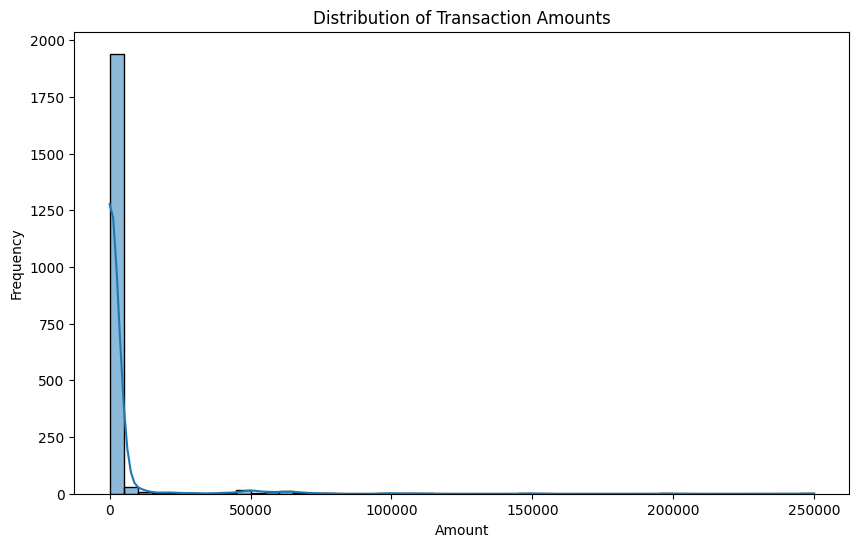

In [15]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

Most transaction amounts are very small, with a few very large values creating a long right tail (skewed distribution).

This code plots a bar chart showing how many transactions fall into each category.

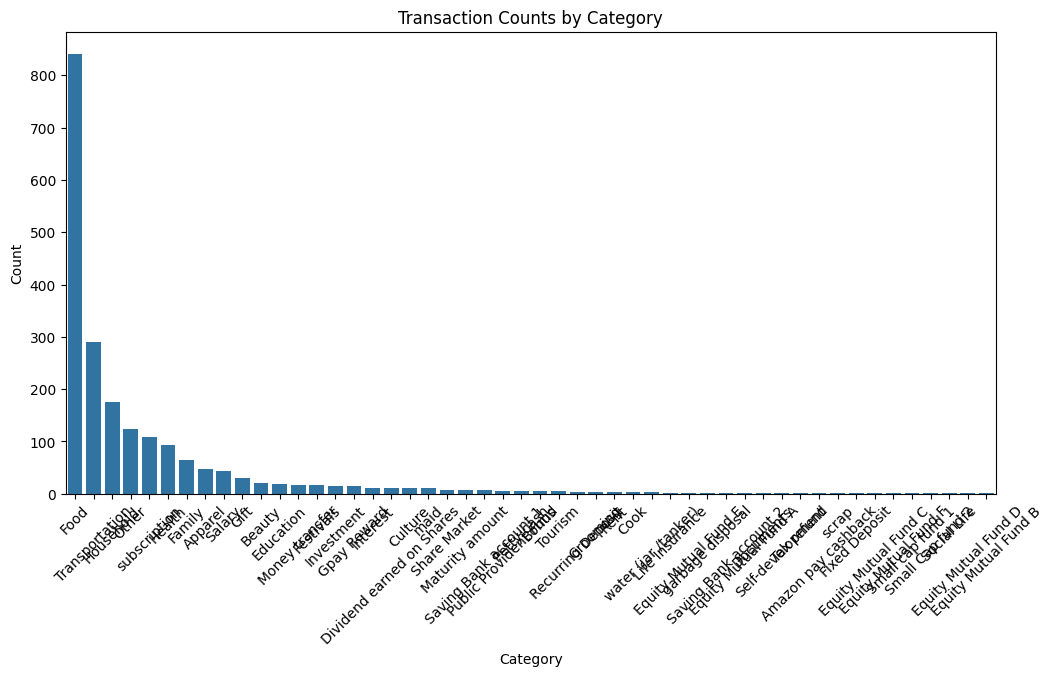

In [16]:
# Transaction counts by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

The ‘Food’ category has the highest number of transactions, followed by Transport and Shopping, while many other categories have very few transactions.

This code creates a bar chart to compare the number of Income, Expense, and Transfer-Out transactions.

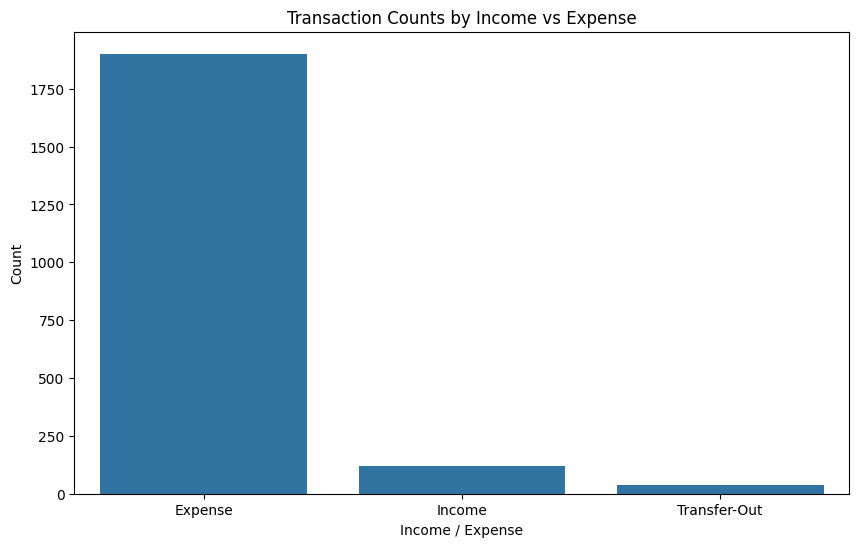

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income/Expense', order=df['Income/Expense'].value_counts().index)
plt.title('Transaction Counts by Income vs Expense')
plt.xlabel('Income / Expense')
plt.ylabel('Count')
plt.show()

Expenses make up the majority of transactions, while Income and Transfer-Out appear much less frequently.

# **Step 4: Time Series Analysis**
● Trend analysis.

● Monthly and daily trends.

Resample data monthly and calculateing the monthly totals.

In [18]:
# Resample data to monthly frequency
monthly_data = df.resample('M', on='Date').sum()

/tmp/ipython-input-2217426780.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


Pandas shows a warning that 'M' is deprecated; it suggests using 'ME' for month-end resampling.

This code plots a monthly line chart showing the total transaction amount for each month.

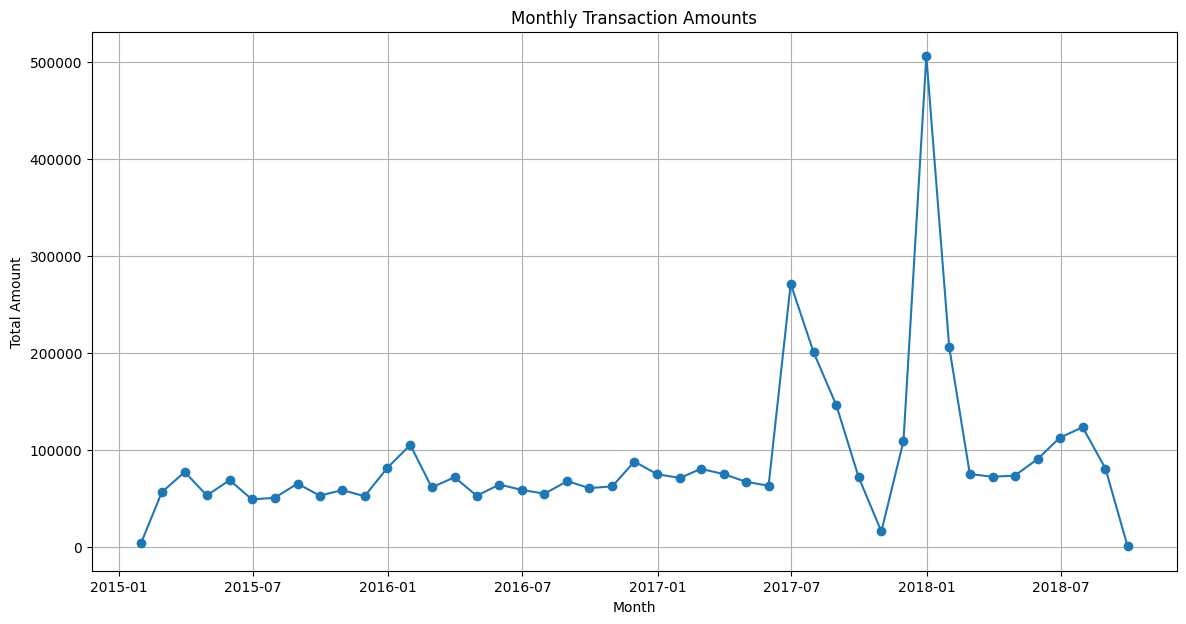

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Monthly spending remains mostly stable with a few sharp spikes, indicating occasional high-value transactions.

Ensure Date is datetime, then resample daily and fill missing days with 0.


In [20]:
# Ensure Date is datetime (already done, but safe to include)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Resample to daily frequency and sum amounts
daily_data = df.resample('D', on='Date').sum(numeric_only=True)

# Fill missing days with 0 (optional but recommended for clean line)
daily_data = daily_data.fillna(0)

Plot daily total transaction amounts as a line chart.

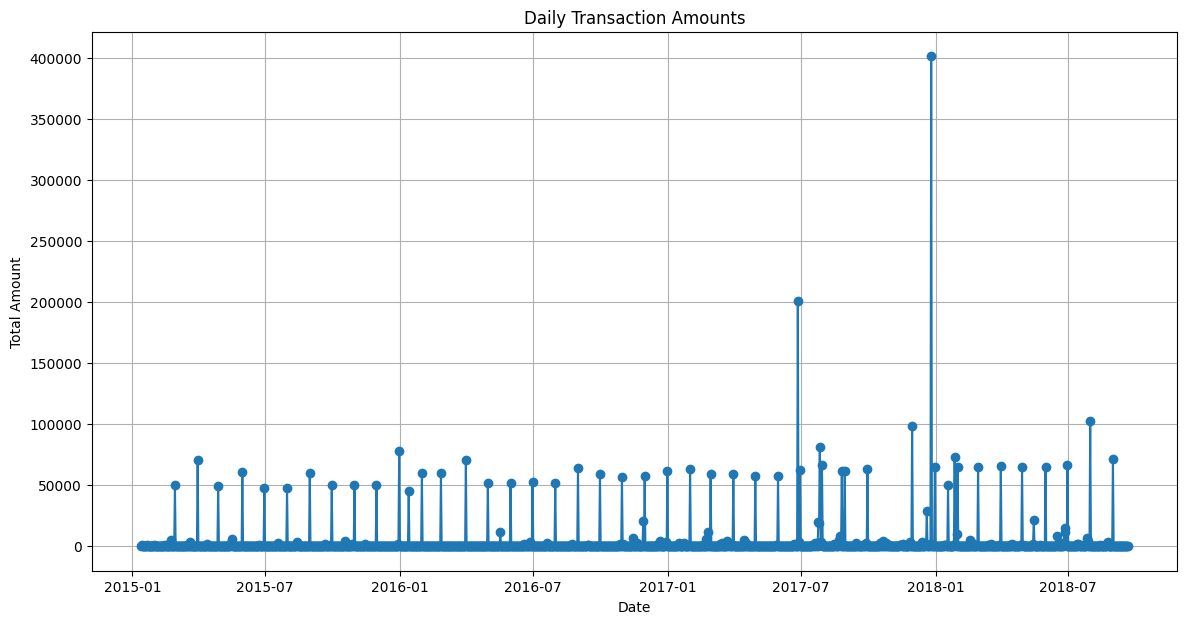

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Daily transaction amounts remain low and consistent, with occasional large spikes indicating high-value transactions on certain days.

# **Step 5: Correlation Analysis**

● Analyze the correlation between transaction categories and amounts.

Create category-wise daily totals, compute correlations, and plot a heatmap


In [22]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
aggfunc='sum', fill_value=0)

In [23]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

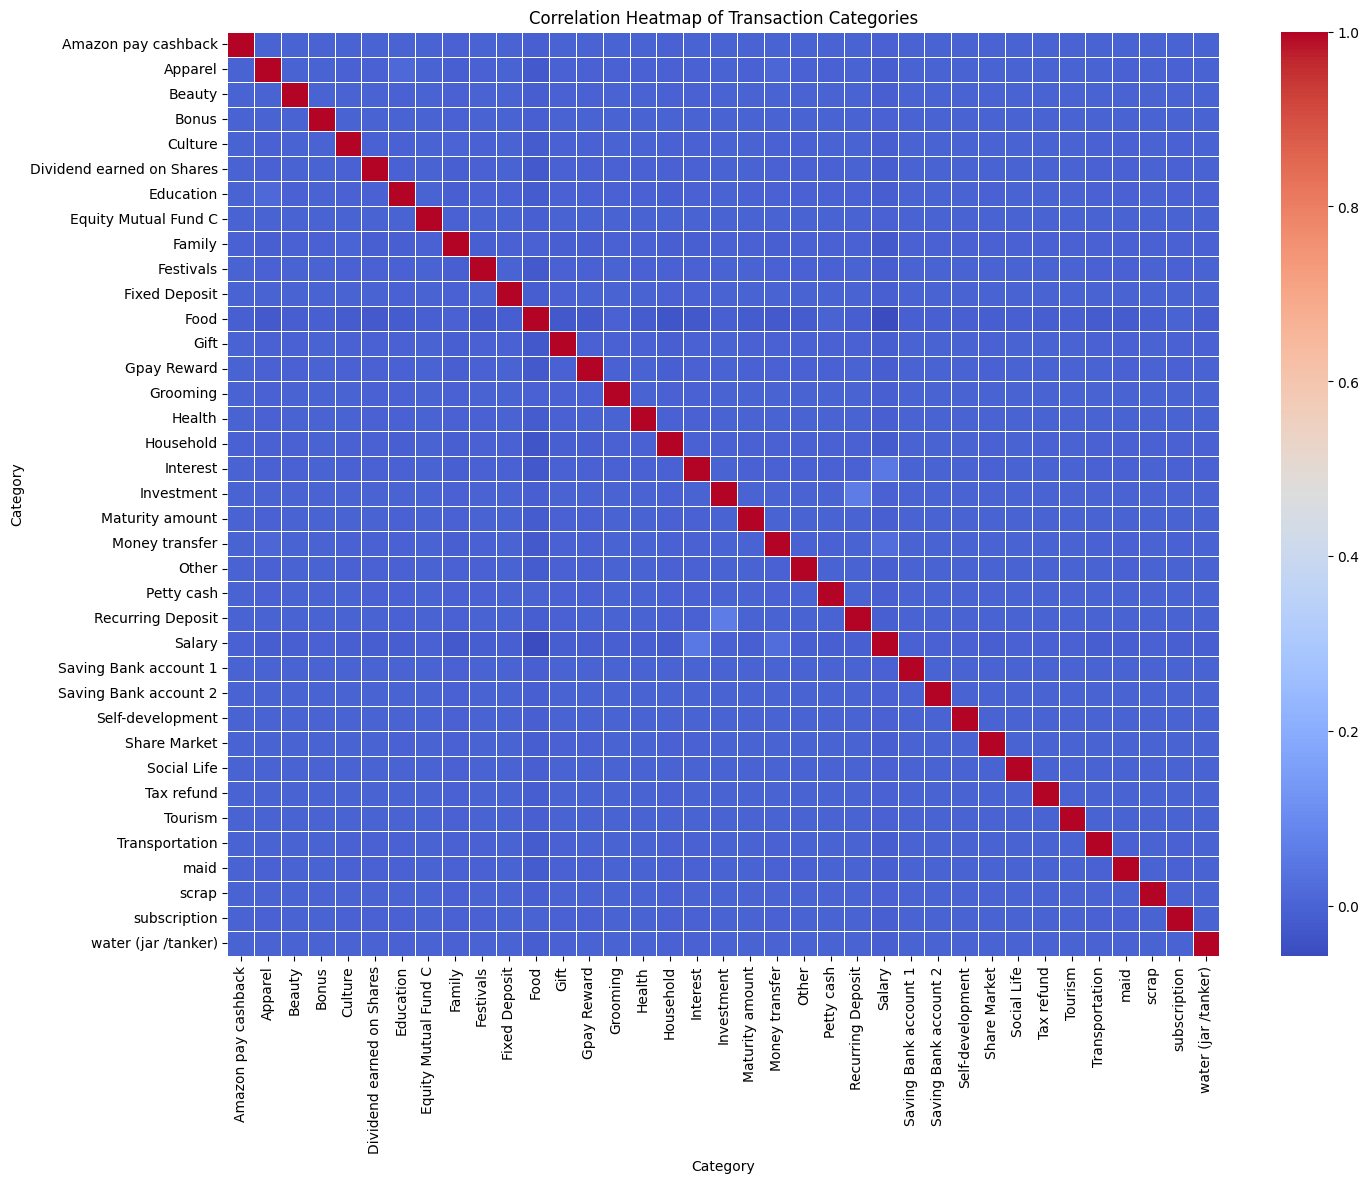

In [24]:
# Plot correlation heatmap
plt.figure(figsize=(16, 12)) # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Most categories show very low or no correlation with each other, meaning spending in one category doesn’t predict spending in another. Only diagonal values show perfect correlation (self-correlation).

# **Step 6: Generate Report**
● Summarize findings and visualizations.

# **Summary**

The financial transactions dataset was analyzed to identify key trends and insights. The data cleaning process involved handling missing values, correcting data types, and removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of transaction amounts, transaction counts by category and type, and significant patterns over time. Time series analysis highlighted monthly and daily transaction trends. Correlation analysis identified relationships between different transaction categories.

# **Key Findings**

● The distribution of transaction amounts showed a right-skewed pattern with most transactions clustered around lower values.

● Sales and Purchases were the most common transaction categories.

● Credit transactions were more frequent than Debit transactions.

● Monthly transaction trends revealed seasonal patterns with peaks in certain months.

● Correlation analysis indicated strong relationships between certain transaction categories.

# **Visualizations**

● Distribution of Transaction Amounts

● Transaction Counts by Category and Type

● Monthly and Daily Transaction Amounts

● Correlation Heatmap of Transaction Categories

This project provides valuable insights into daily financial transactions, helping to inform decision-making and strategic planning.